In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import pickle

In [2]:
house = pd.read_csv('kc_house_data_train.csv', index_col = 0)

In [3]:
house['bedrooms'] = np.where(house['bedrooms'] != 33, house['bedrooms'], 3)

# Adding distance to Water Column

In [ ]:
waterfronts = house[house['waterfront'] == 1][['lat', 'long']]

In [ ]:
water_lat = []

for x in waterfronts['lat']:
    water_lat.append(x)

water_long = []

for x in waterfronts['long']:
    water_long.append(x)

In [ ]:
with open('water_lat', 'wb') as handle:
    pickle.dump(water_lat, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('water_long', 'wb') as handle:
    pickle.dump(water_long, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
water_dist = []

In [ ]:
for i in range(len(house['lat'])):
    cmin = 100
    for j in range(len(water_lat)):
        c2 = np.sqrt((house['lat'][i] - water_lat[j])**2 + (house['long'][i] - water_long[j])**2)
        if c2 < cmin:
            cmin = c2
    water_dist.append(cmin)

In [5]:
house['water_distance'] = water_distance

In [ ]:
house[house['water_distance'] == 0][['lat', 'long']].head(50)

In [ ]:
with open('water_distance', 'wb') as handle:
    pickle.dump(water_dist, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('water_distance', 'rb') as handle:
    water_distance = pickle.load(handle)

In [ ]:
house.plot.scatter('zipcode', 'water_distance')

# Creating log and sqrt to test the data

In [6]:
house['price_log'] = np.log(house['price'])

In [ ]:
house['price_sqrt'] = np.sqrt(house['price'])

# Analyzing the data by numbers

In [ ]:
house.groupby('zipcode')['price'].describe().sort_values('mean', ascending = False)

In [ ]:
house.groupby('view')['price'].describe()

In [ ]:
house.groupby('grade')['price'].describe()

# EDA using graphs

In [ ]:
practice.plot.scatter('water_distance', 'view')

In [ ]:
house.plot.scatter('sqft_living', 'price')

# standard linear regression

In [ ]:
house.plot.scatter('sqft_lot', 'price')

# ??? weird curve

In [ ]:
house.plot.scatter('floors', 'price')

In [ ]:
house.plot.scatter('bedrooms', 'price')

# ??? not sure what this could mean, possibly remove or group up 

In [ ]:
house.plot.scatter('bathrooms', 'price')

# fairly linear but still not a great indicator

In [ ]:
house.plot.scatter('view', 'price')

# view doesnt seem to have a great relation

In [ ]:
house.plot.scatter('grade', 'price')

# some linear relation but possibly a logistic relation 

In [ ]:
house.plot.scatter('condition', 'price')

# possibly groupy by 3 and higher or less than 3 since there is a big difference

In [ ]:
house.plot.scatter('yr_built', 'price')

In [ ]:
house.plot.scatter('yr_renovated', 'price')

In [ ]:
# for the year columns, we could add them together and put it as a column of years since last reno

In [ ]:
house.plot.scatter('sqft_above', 'price')

# very similar to sqft_living so possibly 

In [ ]:
house.plot.scatter('sqft_basement', 'price')

# some linearity but not very (possibly create a column of 0s and 1 to see 
# if they place has a basement and if there is any correlation)

# Creating a new columns for latest renovation

In [7]:
years_since_renovation = []
for i in range(len(house['yr_built'])):
    if house['yr_renovated'][i] > house['yr_built'][i]:
        years_since_renovation.append(int(house.date[i][0:4]) - house['yr_renovated'][i])
    else:
        years_since_renovation.append(int(house.date[i][0:4]) - house['yr_built'][i])

In [8]:
house['last_change'] = years_since_renovation

# Creating a column to practice on so we still have the original house data

In [9]:
practice = house

# Converting Basement sqft to a column of 1s and zeros for whether or not there is a basement

In [10]:
practice['basement'] = np.where(practice['sqft_basement'] > 0, 1, 0)

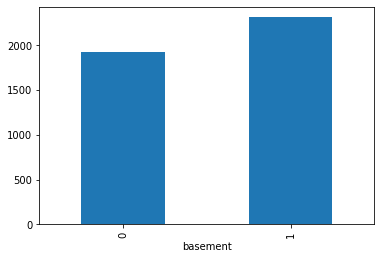

In [11]:
practice.groupby('basement')['sqft_living'].mean().plot.bar()

# items to remove
id

date

sqft_above

sqft_basement

sqft_living15

sqft_lot15

yr_built

yr_renovated

lat

long


# items to turn into dummies
view

condition

grade

zip code

# Dropping columns deemed unnecessary due to very low correlation

In [12]:
practice.drop(columns = ['id', 'date', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
              'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront'], axis = 1, inplace = True)

# Creating dummy columns

In [84]:
zip_dummy = pd.get_dummies(practice['zipcode'], prefix = 'zip', drop_first = True)
# view_dummy = pd.get_dummies(practice['view'], prefix = 'view', drop_first = True)
grade_dummy = pd.get_dummies(practice['grade'], prefix = 'grade', drop_first = True)
# condition_dummy = pd.get_dummies(practice['condition'], prefix = 'condition', drop_first = True)

In [85]:
grade_dummy.drop(columns = ['grade_3', 'grade_4', 'grade_5','grade_8'], axis=1, inplace = True)

In [86]:
#view_dummy.drop(columns = ['view_1'], axis=1, inplace = True)

In [87]:
zip_dummy = zip_dummy[['zip_98004']]

# Creating new df to include all dummies

In [88]:
full_practice = pd.concat([practice, zip_dummy, grade_dummy], axis = 1)


# Attempting some interactions for grade and sqft_living

In [72]:
# full_practice['grade_6_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_6'])]
# full_practice['grade_7_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_7'])]
# full_practice['grade_9_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_9'])]
# full_practice['grade_10_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_10'])]
# full_practice['grade_11_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_11'])]
# full_practice['grade_12_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_12'])]
# full_practice['grade_13_sqft'] = [a*b for a,b in zip(full_practice['sqft_living'], full_practice['grade_13'])]


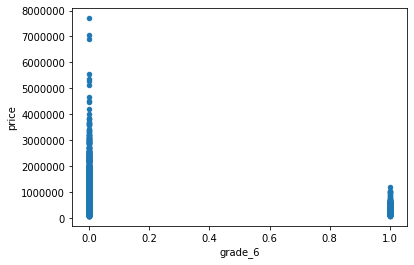

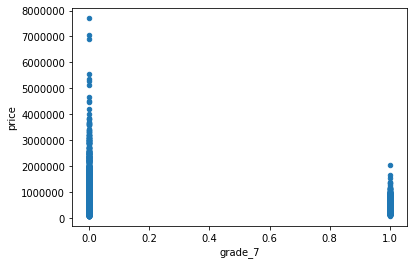

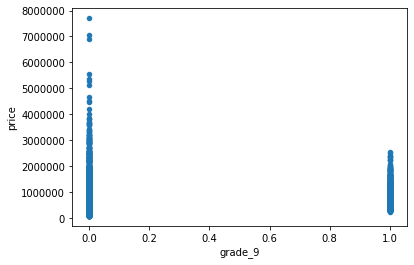

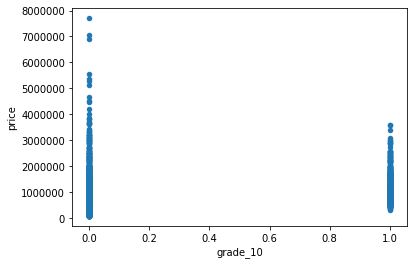

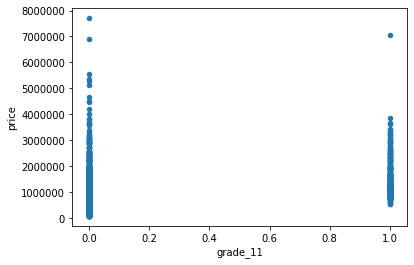

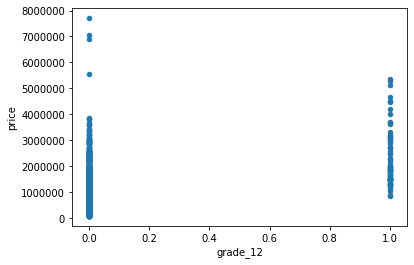

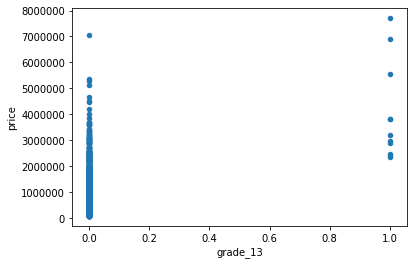

In [73]:
# full_practice.plot.scatter('grade_6', 'price')
# full_practice.plot.scatter('grade_7', 'price')
# full_practice.plot.scatter('grade_9', 'price')
# full_practice.plot.scatter('grade_10', 'price')
# full_practice.plot.scatter('grade_11', 'price')
# full_practice.plot.scatter('grade_12', 'price')
# full_practice.plot.scatter('grade_13', 'price')

# Dropping extra columns that were made into dummies

In [89]:
full_practice.drop(columns = ['view', 'condition', 'grade', 'zipcode', 
                              'sqft_lot', 'floors', 'bedrooms', 
                              'bathrooms', 'last_change'], axis = 1, inplace = True)

In [49]:
# Dropped sqft_lot as it was not a good indicator according to the model and correlation

In [75]:
# full_practice.drop(columns = ['grade_6', 'grade_7','grade_9','grade_10',
#                               'grade_11','grade_12','grade_13'], axis = 1, inplace = True)

# Making the features column

In [90]:
features_columns = []
for x in full_practice.columns:
    if 'price' not in x:
        features_columns.append(x)
    else:
        pass

# Removing all extreme values from the data set

In [91]:
def ext_values(df, extreme_cols):
    new_df = df.copy()
    for col in extreme_cols:
        std = new_df[col].std()
        mean = new_df[col].mean()
        value = mean+(5*std)
        new_df[col] = new_df[col].apply(lambda x: value if (np.abs(x-mean) > 5*std) else x)
    return new_df

In [92]:
full_practice = ext_values(full_practice, features_columns)

In [ ]:
lr_model = ols(formula = 'price_log~sqft_living+water_distance+basement+grade_6+grade_7+grade_9+grade_10+grade_11+grade_12+grade_13+zip_98004', data = full_practice).fit()

In [ ]:
lr_model.summary()

# Creating target variable and features

In [93]:
target = np.log(full_practice['price'])
features = full_practice[features_columns]

# Train, test split on the target and features

In [94]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23,test_size=0.2)  

In [ ]:
X_scale = X_train

# Scaling all the data using a standard scalar

In [ ]:
scaler = StandardScaler()
final_scaler = scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=features_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=features_columns)

# Standard linear regression using scikit

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error((y_test), y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', float(train_rmse), "vs. Testing: ", float(test_rmse))

# Plotting Residuals to test

In [ ]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

# Applying recursive feature elimination

In [55]:
from sklearn.feature_selection import RFECV

In [56]:
ols = linear_model.LinearRegression()

In [57]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [58]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [59]:
list(removed_rfe)

[]

In [60]:
len(selected_rfe)

11

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_train_pred_rfe = np.exp(lm_rfe.predict(X_train[selected_rfe]))

train_rmse_rfe = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred_rfe))


print('Training Root Mean Squared Error:' , train_rmse_rfe)

y_pred_rfe = np.exp(lm_rfe.predict(X_test[selected_rfe]))

test_rmse_rfe = np.sqrt(metrics.mean_squared_error((y_test), y_pred_rfe))

print('Testing Root Mean Squared Error:' , test_rmse_rfe)


print("vs. Testing: ", float(test_rmse), 
      "vs. Testing rfe: ", float(test_rmse_rfe))

# Applying Ftest selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5)

selector.fit(X_train, y_train)

In [ ]:
selected_ftest = X_train.columns[selector.get_support()]
removed_ftest = X_train.columns[~selector.get_support()]

In [ ]:
list(removed_ftest)

In [ ]:
list(selected_ftest)

In [ ]:
#instantiate a linear regression object
lm_ftest = LinearRegression()

#fit the linear regression to the data
lm_ftest = lm_ftest.fit(X_train[selected_ftest], y_train)

y_train_pred_ftest = lm_ftest.predict((X_train[selected_ftest]))

train_rmse_ftest = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred_ftest))


print('Training Root Mean Squared Error:' , train_rmse_ftest)

y_pred_ftest = np.exp(lm_ftest.predict((X_test[selected_ftest])))

test_rmse_ftest = np.sqrt(metrics.mean_squared_error((y_test), y_pred_ftest))

print('Testing Root Mean Squared Error:' , test_rmse_ftest)


print("vs. Testing: ", float(test_rmse), 
      "vs. Testing rfe: ", float(test_rmse_rfe),
      "vs. Testing ftest: ", float(test_rmse_ftest))

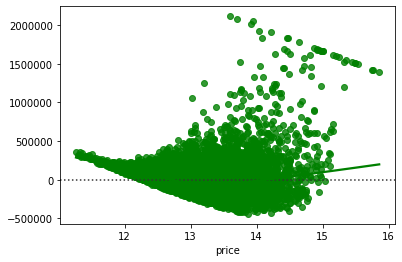

In [97]:
sns.residplot( y_train, y_train_pred_lasso,lowess=True, color="g")

# Applying lasso method

In [95]:
from sklearn.linear_model import Lasso

In [96]:
lasso = Lasso(alpha=0.01, max_iter = 5000, normalize=False)

final_lasso = lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse))
print('Testing Error: '+ str(test_rmse))

Training Error: 504316.6764906199
Testing Error: 557737.1275531488


In [63]:
with open('final_lasso', 'wb') as handle:
    pickle.dump(final_lasso, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('final_scaler', 'wb') as handle:
    pickle.dump(X_scale, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
with open('final_lasso_lc', 'wb') as handle:
    pickle.dump(final_lasso, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
sns.residplot(y_train, y_train_pred_lasso,lowess=True, color="g")

# Attempting Variance Inflation Method

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(5)